In [1]:
import pandas as pd 
import yfinance as yf
import boto3
from datetime import datetime
%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


# Get Data

In [2]:
data = yf.download('SPY',start = '2018-01-01',end = '2021-04-17')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,249.993347,86655700
2018-01-03,268.959991,270.640015,268.959991,270.470001,251.574600,90070400
2018-01-04,271.200012,272.160004,270.540009,271.609985,252.635040,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,254.318573,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,254.783691,57319200


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,249.993347,86655700
2018-01-03,268.959991,270.640015,268.959991,270.470001,251.574600,90070400
2018-01-04,271.200012,272.160004,270.540009,271.609985,252.635040,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,254.318573,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,254.783691,57319200
...,...,...,...,...,...,...
2021-04-12,410.850006,411.929993,410.200012,411.640015,406.293396,56704900
2021-04-13,411.529999,413.529999,411.119995,412.859985,407.497528,56551000
2021-04-14,412.829987,413.959991,410.869995,411.450012,406.105835,61659900


In [7]:
# add in missing dates
date_range = pd.date_range(data.index[0],data.index[-1])
date_range

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09',
               '2018-01-10', '2018-01-11',
               ...
               '2021-04-07', '2021-04-08', '2021-04-09', '2021-04-10',
               '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16'],
              dtype='datetime64[ns]', length=1201, freq='D')

In [9]:
# make a new dataframe containing all dates
df = pd.DataFrame(index = date_range)
df.head()

""
2018-01-02
2018-01-03
2018-01-04
2018-01-05
2018-01-06


In [10]:
df = df.join(data,how='outer')
df.head()

,Open,High,Low,Close,Adj Close,Volume
2018-01-02,267.839996,268.809998,267.399994,268.769989,250.768402,86655700.0
2018-01-03,268.959991,270.640015,268.959991,270.470001,252.354568,90070400.0
2018-01-04,271.200012,272.160004,270.540009,271.609985,253.418167,80636400.0
2018-01-05,272.510010,273.559998,271.950012,273.420013,255.106979,83524000.0
2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# fill in missing data
df[['Open','High','Low','Close','Adj Close']] = \
    df[['Open','High','Low','Close','Adj Close']].fillna(method='ffill')
df['Volume'] = df['Volume'].fillna(0)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
2018-01-02,267.839996,268.809998,267.399994,268.769989,250.768402,86655700.0
2018-01-03,268.959991,270.640015,268.959991,270.470001,252.354568,90070400.0
2018-01-04,271.200012,272.160004,270.540009,271.609985,253.418167,80636400.0
2018-01-05,272.510010,273.559998,271.950012,273.420013,255.106979,83524000.0
2018-01-06,272.510010,273.559998,271.950012,273.420013,255.106979,0.0
2018-01-07,272.510010,273.559998,271.950012,273.420013,255.106979,0.0
2018-01-08,273.309998,274.100006,272.980011,273.920013,255.573486,57319200.0
2018-01-09,274.399994,275.250000,274.079987,274.540009,256.151978,57254000.0
2018-01-10,273.679993,274.420013,272.920013,274.119995,255.760117,69574300.0
2018-01-11,274.750000,276.119995,274.559998,276.119995,257.626099,62361500.0


In [12]:
# save it just in case need 
df.to_csv('daily_price_full.csv')

In [13]:
# check format
!head daily_price_full.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
# AWS Forecast requires a column called item-id
df['item_id'] = 'SPY'

In [15]:
#Leave the last 30 points for forecast comparison
FORECAST_LENGTH = 30
train = df.iloc[:-FORECAST_LENGTH]
train.head()

,Open,High,Low,Close,Adj Close,Volume,item_id
2018-01-02,267.839996,268.809998,267.399994,268.769989,250.768402,86655700.0,SPY
2018-01-03,268.959991,270.640015,268.959991,270.470001,252.354568,90070400.0,SPY
2018-01-04,271.200012,272.160004,270.540009,271.609985,253.418167,80636400.0,SPY
2018-01-05,272.510010,273.559998,271.950012,273.420013,255.106979,83524000.0,SPY
2018-01-06,272.510010,273.559998,271.950012,273.420013,255.106979,0.0,SPY


In [19]:
# AWS differentiates btw 'target time series' and 'related time series'
train_target_series = train[['Close','item_id']]
train_related_series = train[['Open','High','Low','Volume','item_id']]

In [20]:
# Save the data which we will upload to S3 later
train_target_series.to_csv('daily_price_target_series.csv',header=None)
train_related_series.to_csv('daily_price_related_series.csv',header=None)

# Create Dataset Group and Upload Data

In [60]:
bucket_name ='awsforecast-test'
region = 'ap-southeast-1'

In [29]:
role_arn = 'arn:aws:iam::064707150529:role/ForecastRole'

In [30]:
# CREATE S3 Client
s3 = boto3.client('s3',region_name=region)

In [31]:
DATASET_FREQUENCY = 'D'
TIMESTAMP_FORMAT = 'yyyy-MM-dd'
dataset_group = 'daily_forecast_dataset_group'

In [32]:
# create boto3 clients
forecast_client = boto3.client(service_name='forecast',region_name=region)
forecastquery_client = boto3.client(service_name='forecastquery',region_name=region)

In [33]:
# create dataset group
create_dataset_group_response = forecast_client.create_dataset_group(
    Domain='CUSTOM',
    DatasetGroupName=dataset_group
)

In [34]:
# wait until it's complete
dataset_group_arn = create_dataset_group_response['DatasetGroupArn']
describe = forecast_client.describe_dataset_group(DatasetGroupArn=dataset_group_arn)
print(describe['Status'])
print(describe['CreationTime'])
print(describe['LastModificationTime'])

ACTIVE
2021-12-31 08:12:10.589000+08:00
2021-12-31 08:12:10.589000+08:00


In [48]:
# Schema for target dataset
# Must match the columns of the csv
target_schema = {
    'Attributes':[
    {
        'AttributeName':'timestamp',
        'AttributeType':'timestamp'
    },
    {
        'AttributeName':'target_value',
        'AttributeType':'float'
    },
    {
        'AttributeName':'item_id',
        'AttributeType':'string'
    }
    ]
}

In [49]:
# give your dataset a name
target_dataset_name = 'close_prices'

In [50]:
# create a dataset
r = forecast_client.create_dataset(
    Domain = 'CUSTOM',
    DatasetType = 'TARGET_TIME_SERIES',
    DatasetName = target_dataset_name,
    DataFrequency = DATASET_FREQUENCY,
    Schema = target_schema
)

In [51]:
# check the response
target_dataset_arn = r['DatasetArn']
describe = forecast_client.describe_dataset(DatasetArn = target_dataset_arn)
print(describe['Status'])
print(describe['CreationTime'])
print(describe['LastModificationTime'])

ACTIVE
2021-12-31 08:25:21.759000+08:00
2021-12-31 08:25:21.759000+08:00


In [52]:
# Schema for related dataset
# Must match the columns of the CSV
# Optional 
related_schema = {
    'Attributes':[
        {
            'AttributeName':'timestamp',
            'AttributeType':'timestamp'
        },
        {
            'AttributeName':'open_value',
            'AttributeType':'float'
        },
        {
            'AttributeName':'high_value',
            'AttributeType':'float'
        },
        {
            'AttributeName':'low_value',
            'AttributeType':'float'
        },
        {
            'AttributeName':'volume_value',
            'AttributeType':'float'
        },
        {
            'AttributeName':'item_id',
            'AttributeType':'string'
        }
        
    ]
}

In [53]:
# give your dataset a name
related_dataset_name = 'related_data'

In [54]:
# create a dataset
r = forecast_client.create_dataset(
    Domain='CUSTOM',
    DatasetType='RELATED_TIME_SERIES',
    DatasetName=related_dataset_name,
    DataFrequency=DATASET_FREQUENCY,
    Schema=related_schema
)

In [55]:
# check the response
related_dataset_arn = r['DatasetArn']
describe = forecast_client.describe_dataset(DatasetArn=related_dataset_arn)
print(describe['Status'])
print(describe['CreationTime'])
print(describe['LastModificationTime'])

ACTIVE
2021-12-31 08:43:52.526000+08:00
2021-12-31 08:43:52.526000+08:00


In [58]:
# Add your datasets to the dataset group
dataset_arns = [target_dataset_arn,related_dataset_arn]
forecast_client.update_dataset_group(
    DatasetGroupArn=dataset_group_arn,
    DatasetArns=dataset_arns
)

{'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '2',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Fri, 31 Dec 2021 00:48:12 GMT',
   'x-amzn-requestid': '9b28937a-444d-4504-85aa-aa858fa6f292'},
  'HTTPStatusCode': 200,
  'RequestId': '9b28937a-444d-4504-85aa-aa858fa6f292',
  'RetryAttempts': 0}}

In [61]:
# Upload data to s3
s3r = boto3.resource('s3',region_name=region)
s3r.Bucket(bucket_name).Object(
    'daily_price_target_series.csv').upload_file('daily_price_target_series.csv')
s3r.Bucket(bucket_name).Object(
    'daily_price_related_series.csv').upload_file('daily_price_related_series.csv')

In [65]:
# Path to your data
s3_target_path = "s3://"+bucket_name+"/daily_price_target_series.csv"
s3_related_path = "s3://"+bucket_name+"/daily_price_related_series.csv"

In [66]:
# launch an import job
target_import_job_response = forecast_client.create_dataset_import_job(
    DatasetImportJobName = dataset_group,
    DatasetArn = target_dataset_arn,
    DataSource = {
        'S3Config':{
            'Path':s3_target_path,
            'RoleArn':role_arn
        }
    },
    TimestampFormat = TIMESTAMP_FORMAT
)

In [71]:
target_import_job_arn = target_import_job_response['DatasetImportJobArn']

# Check if it's done 
describe = forecast_client.describe_dataset_import_job(DatasetImportJobArn=target_import_job_arn)
print(describe['Status'])
print(describe['CreationTime'])
print(describe['LastModificationTime'])

ACTIVE
2021-12-31 08:57:01.080000+08:00
2021-12-31 09:03:15.165000+08:00


In [72]:
# Launch an import job for related dataset - dont have to wair for previous job
related_import_job_response = forecast_client.create_dataset_import_job(
    DatasetImportJobName = dataset_group,
    DatasetArn = related_dataset_arn,
    DataSource = {
        'S3Config':{
            'Path':s3_related_path,
            'RoleArn':role_arn
        }
    },
    TimestampFormat = TIMESTAMP_FORMAT
)

In [74]:
related_import_job_arn = related_import_job_response['DatasetImportJobArn']

#check if is done
describe = forecast_client.describe_dataset_import_job(DatasetImportJobArn = related_import_job_arn)
print(describe['Status'])
print(describe['CreationTime'])
print(describe['LastModificationTime'])

ACTIVE
2021-12-31 09:09:01.584000+08:00
2021-12-31 09:11:14.978000+08:00


# Make Predictor

In [75]:
algorithm_arn = 'arn:aws:forecast:::algorithm/Deep_AR_Plus'
predictor_name='deep_ar_plus_predictor'

In [78]:
# By default will return [0.1,0.5,0.9]
create_predictor_response = forecast_client.create_predictor(
    PredictorName=predictor_name,
    AlgorithmArn=algorithm_arn,
    ForecastHorizon=FORECAST_LENGTH,
    PerformAutoML=False,
    PerformHPO=False,
    InputDataConfig={"DatasetGroupArn":dataset_group_arn},
    FeaturizationConfig={'ForecastFrequency':DATASET_FREQUENCY}
)

In [81]:
create_predictor_response['Status']

KeyError: 'Status'

In [83]:
predictor_arn = create_predictor_response['PredictorArn']

In [88]:
# wait for active
describe = forecast_client.describe_predictor(PredictorArn=predictor_arn)
print(describe['Status'])
print(describe['CreationTime'])
print(describe['LastModificationTime'])

ACTIVE
2021-12-31 09:25:48.593000+08:00
2021-12-31 10:07:48.338000+08:00


In [89]:
# GET ACCURACY METRICS
forecast_client.get_accuracy_metrics(PredictorArn=predictor_arn)

{'PredictorEvaluationResults': [{'AlgorithmArn': 'arn:aws:forecast:::algorithm/Deep_AR_Plus',
   'TestWindows': [{'EvaluationType': 'SUMMARY',
     'Metrics': {'RMSE': 20.047982396477813,
      'WeightedQuantileLosses': [{'LossValue': 0.013173230966853598,
        'Quantile': 0.9},
       {'LossValue': 0.045450513329978286, 'Quantile': 0.5},
       {'LossValue': 0.0500653759325753, 'Quantile': 0.1}]}},
    {'EvaluationType': 'COMPUTED',
     'ItemCount': 1,
     'Metrics': {'RMSE': 20.047982396477813,
      'WeightedQuantileLosses': [{'LossValue': 0.013173230966853598,
        'Quantile': 0.9},
       {'LossValue': 0.045450513329978286, 'Quantile': 0.5},
       {'LossValue': 0.0500653759325753, 'Quantile': 0.1}]},
     'TestWindowEnd': datetime.datetime(2021, 3, 18, 8, 0, tzinfo=tzlocal()),
     'TestWindowStart': datetime.datetime(2021, 2, 16, 8, 0, tzinfo=tzlocal())}]}],
 'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '1084',
   'content-type': 

# Generate Forecast

In [90]:
forecast_name  = 'deep_ar_plus_forecast'

In [91]:
create_forecast_response = forecast_client.create_forecast(
    ForecastName = forecast_name,
    PredictorArn= predictor_arn
)

In [92]:
forecast_arn = create_forecast_response['ForecastArn']

In [1]:
# take some time
describe = forecast_client.describe_forecast(ForecastArn = forecast_arn)
print(describe['Status'])
print(describe['CreationTime'])
print(describe['LastModificationTime'])

NameError: name 'forecast_client' is not defined

# Check Forecast

In [95]:
forecast_response = forecastquery_client.query_forecast(
    ForecastArn = forecast_arn,
    Filters={'item_id':'SPY'}
)

In [96]:
forecast_response

{'Forecast': {'Predictions': {'p10': [{'Timestamp': '2021-03-18T00:00:00',
     'Value': 397.253692627},
    {'Timestamp': '2021-03-19T00:00:00', 'Value': 399.1188964844},
    {'Timestamp': '2021-03-20T00:00:00', 'Value': 400.5835266113},
    {'Timestamp': '2021-03-21T00:00:00', 'Value': 400.8605651855},
    {'Timestamp': '2021-03-22T00:00:00', 'Value': 401.3554382324},
    {'Timestamp': '2021-03-23T00:00:00', 'Value': 403.5381774902},
    {'Timestamp': '2021-03-24T00:00:00', 'Value': 404.8131713867},
    {'Timestamp': '2021-03-25T00:00:00', 'Value': 406.3849487305},
    {'Timestamp': '2021-03-26T00:00:00', 'Value': 405.3258056641},
    {'Timestamp': '2021-03-27T00:00:00', 'Value': 405.7554016113},
    {'Timestamp': '2021-03-28T00:00:00', 'Value': 404.4725341797},
    {'Timestamp': '2021-03-29T00:00:00', 'Value': 404.5588989258},
    {'Timestamp': '2021-03-30T00:00:00', 'Value': 402.9291992188},
    {'Timestamp': '2021-03-31T00:00:00', 'Value': 405.5067749023},
    {'Timestamp': '2021-

In [97]:
def parse_aws_forecast(d10,d50,d90):
    ts = pd.Timestamp(d10['Timestamp'])
    val1 = d10['Value']
    val2 = d50['Value']
    val3 = d90['Value']
    return ts,val1,val2,val3

In [99]:
p10 = forecast_response['Forecast']['Predictions']['p10']
p50 = forecast_response['Forecast']['Predictions']['p50']
p90 = forecast_response['Forecast']['Predictions']['p90']

parsed = [parse_aws_forecast(d1,d2,d3) for d1,d2,d3 in zip(p10,p50,p90)]
forecast_df = pd.DataFrame(parsed,columns = ['timestamp','p10','p50','p90'])
forecast_df.set_index('timestamp',inplace=True)

In [100]:
forecast_df

,p10,p50,p90
timestamp,,,
2021-03-18,397.253693,403.148529,408.116791
2021-03-19,399.118896,403.985626,409.047760
2021-03-20,400.583527,405.017822,410.474976
2021-03-21,400.860565,405.578522,411.576813
2021-03-22,401.355438,407.147705,412.773804
2021-03-23,403.538177,408.712585,415.198639
2021-03-24,404.813171,410.645020,416.997345
2021-03-25,406.384949,411.265686,416.865295
2021-03-26,405.325806,411.524109,417.415527


<AxesSubplot:>

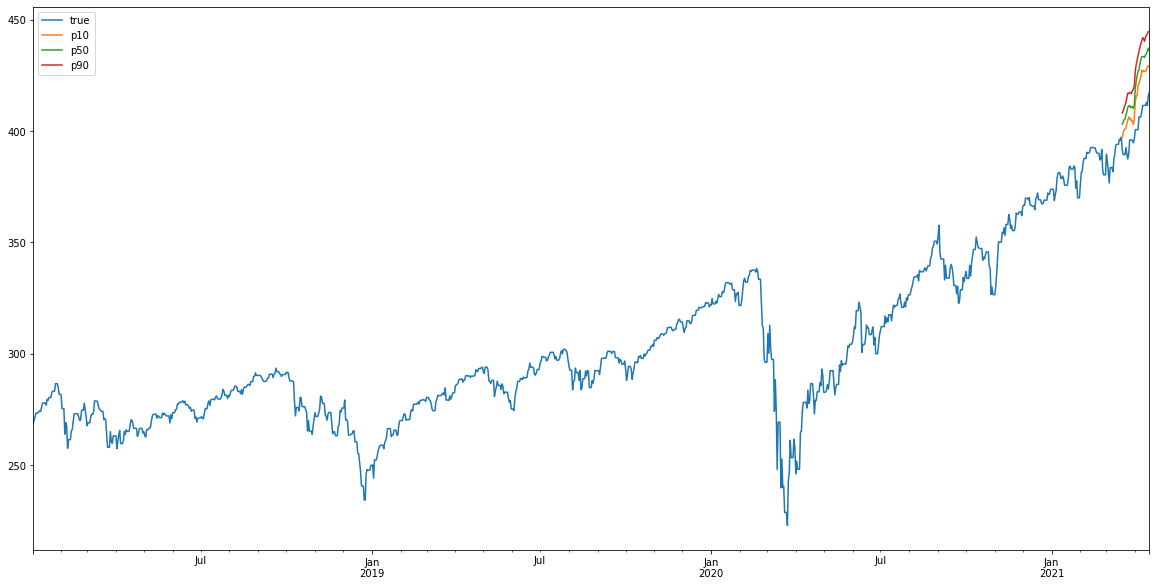

In [106]:
true_df = df[['Close']].copy()
true_df.columns = ['true']

full_df = true_df.join(forecast_df,how='outer')
full_df[['true','p10','p50','p90']].plot(figsize = (20,10))

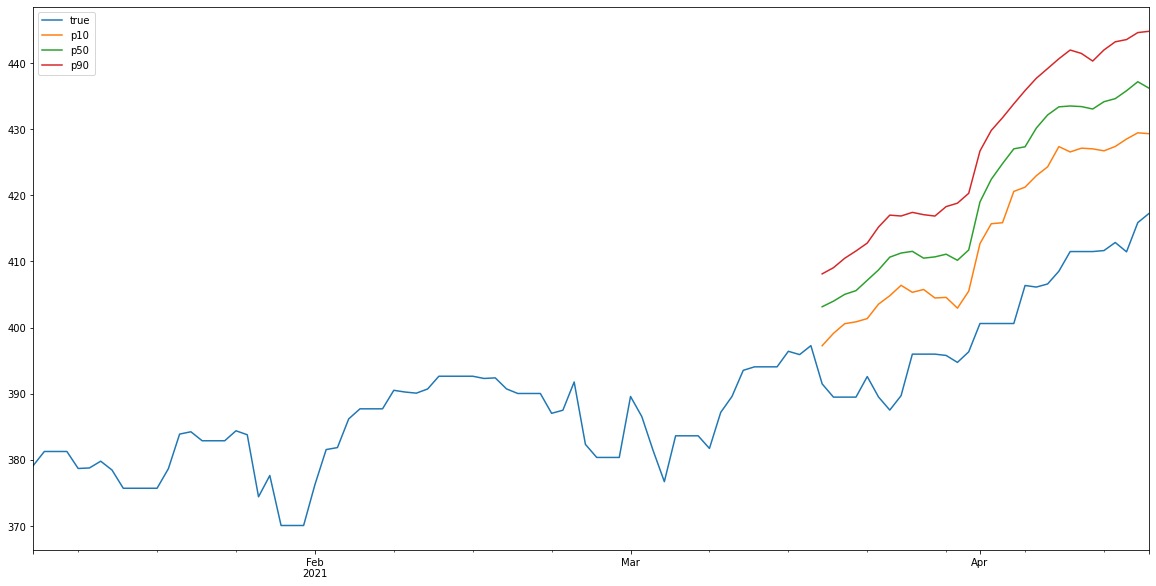

In [107]:
full_df.iloc[-100:][['true','p10','p50','p90']].plot(figsize=(20,10));